## Victor Gómez
### victor.gomez@cimat.mx


# Maestría en Cómputo Estadístico
# CIMAT Monterrey

# <center>Tópicos selectos de ciencia de datos<center>
# <center>Tarea 2<center>
## <center>Para entregar el 16 de octubre de 2020<center>

Instrucciones: 

- Base: https://www.kaggle.com/moltean/fruits

- De esta base seleccionamos las siguientes 29 categorias:

Apple Braeburn Clementine Orange Tamarillo
Apple Golden 2 Cocos Peach Tangelo
Apple Granny Smith Corn Pear Tomato 4
Apple Red Delicious Fig Pear Red Walnut
Avocado Granadilla Pepper Green Watermelon
Banana Lady Finger Lemon Pepper Red
Cherry 2 Lychee Potato White
Cherry Wax Yellow Onion Red Strawberry

- Hay una carpeta llamada Training y otra llamada Test que contienen los datos del conjunto de entrenamiento y del conjunto prueba.

- En la descripcion de los ejercicios no se especifica el numero de capas y de unidades ocultas que deben usar para construir el clasicador. Es parte de la exploracion que tienen que realizar para denir la arquitectura de la red. Puede agregar un comentario de las pruebas que realizo antes de llegar al clasicador con que va a presentar los resultados.

# Ejercicio 1:

Diseñe una red neuronal profunda densa multiclase que reciba como entrada las imagenes vectorizadas (el tensor de dimensiones m x n x 3 se convierte en un vector de tamaño 3mn) de las categorias seleccionadas de la base de datos fruit-360 y que la salida use una funcion de activacion softmax.

1. Si lo considera necesario, puede aplicar un escalamiento a las imagenes para reducir su tamaño antes de vectorizarlas.
2. Use los datos del directorio Test como el conjunto de validacion para aplicar la estrategia early stopping para evitar el sobreajuste de la red.
3. Entrene la red usando dos estrategias de optimizacion diferentes.
4. Describa la arquitectura de la red que diseñno y , la cantidad de parametros que tiene, el numero de epocas que se realizaron y el tiempo promedio que tarda cada epoca para cada una estrategias de optimizacion. Reporte el valor que alcanza la funcion de perdida y la exactitud. Puede generar una grafica que muestre estos datos.
5. Se proporcionara un conjunto de imagenes que no pertenecen a esta base de datos para que lo use como conjunto de prueba. La liga para descargar este conjunto se le comunicara a inicios de la proxima semana. Genere la matriz de confusion de los resultados del clasificador con ese conjunto de prueba. Revise las imagenes de ese conjunto en las categorias donde el clasificador se equivoque mas y agregue un comentario sobre si se justifican los errores de alguna manera por las diferencias que note con respecto al conjunto con el que fue entrenado el clasicador.

### <font color=green>Tu respuesta aquí</font>

## Modelos:

Se diseñaron 2 modelos: 

- Modelo 1 con optimizador SGD, tamaño del Batch de 8, función de activación en las capas ocultas sigmoid, 1 capas oculta, 97 unidades en capa oculta, 2 epocas, Batch normalization y regularización dropout con tasa de 0.25 en cada capa oculta. Tiempo promedio por época 4.27s, valor de la función de perdida y exactitud para el conjunto de validación de 0.011 y 0.999 respectivamente.

- Modelo 2 con optimizador adam, tamaño del Batch de 16, función de activación en las capas ocultas tanh, 1 capa oculta, 90 unidades, 2 epocas, Batch normalization y regularización dropout con tasa de 0.05 en cada capa oculta. Tiempo promedio por época 3.05s, valor de la función de perdida y exactitud para el conjunto de validación de 0.025 y 0.995 respectivamente.


El mejor modelo seleccionado fue el primero, debido a que la complejidad de ambos modelos es muy similar al igual que sus valores de exactitud, en cuanto a tiempo tambien son muy similares, ligeramente superior el segundo modelo, sin embargo al revisar las matrices de confusión correspondientes el primer modelo muestra menos errores.


<img src="Tarea2_victor_gomez_P1M1.png" height="40%" width="40%"/>
<center> Figura 1.1: Matriz de confusión del Modelo 1 <center>


In [1]:
#tensorflow
import tensorflow as tf
Modelo1 = tf.keras.models.load_model('Tarea2_victor_gomez_P1M1.h5') #carga el mejor modelo
Modelo1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 97)                261997    
_________________________________________________________________
batch_normalization (BatchNo (None, 97)                388       
_________________________________________________________________
dropout (Dropout)            (None, 97)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 29)                2842      
Total params: 265,227
Trainable params: 265,033
Non-trainable params: 194
_________________________________________________________________


El procedimiento que se siguió  para diseñar los modelos fue el siguiente:

- Se leyeron los datos de entrenamiento y de prueba, se les aplicó una escala quedando (30,30,3), se normalizaron y se aplanaron. Del conjunto de entrenamiento, se seleccionó un conjunto más pequeño (20%). Para evitar problema por clases desbalanceadas se seleccionaron aleatoriamente solo 427 del total para cada categoría para el conjunto de entrenamiento y 143 para el conjunto de prueba.

- Con el conjunto pequeño, se realizó una búsqueda aleatoria de hiperparametros, primero para definir los optimizadores [sgd, Adam, rmsprop], el tamaño del batch [8-128], y las funciones de activación en las unidades ocultas [relu, elu, tanh], para un tamaño pequeño de épocas 3 con validación cruzada 3-fold.

- Con los resultados anteriores, se seleccionaron 2 optimizadores, el mejor del paso previo sgd y Adam, se tomaron los resultados del paso anterior de igual forma para el conjunto pequeño y para 3 épocas con validación cruzada 3-fold, se volvió a realizar una búsqueda aleatoria de hiperparametros, ahora el numero de capas y unidades ocultas, estas se seleccionaron aleatoriamente de un rango entre [1-4] y [50-100] respectivamente.

- Con los resultados anteriores se construyeron los modelos, se utilizó todo el conjunto de entrenamiento y se aplicó el criterio early stopping con el conjunto de prueba para seleccionar el numero de épocas para entrenar el modelo y evitar el sobre ajuste.


## Visualiza los modelos, la función de costo y exactitud por épocas

In [2]:
# funciones para visualizar los modelos
%load_ext tensorboard

#%tensorboard --logdir logs #problema, no se ejecuta esta linea

# Starts a TensorBoard server on the logs directory, on port 6006
# and opens a new tab in your browser to use it.
def tb(logdir="logs", port=6006, open_tab=True, sleep=2):
    import subprocess
    proc = subprocess.Popen(
        "tensorboard --logdir={0} --port={1}".format(logdir, port), shell=True)
    if open_tab:
        import time
        time.sleep(sleep)
        import webbrowser
        webbrowser.open("http://127.0.0.1:{}/".format(port))
    return proc

In [3]:
server1 = tb('Tarea2_victor_gomez_P1') #abre tensorboard en una nueva pagina, si hay problemas volver a cargar la pagina

In [4]:
server1.kill()  # stops the first server

### Leer datos de prueba

In [ ]:
#librerias necesarias
import pandas as pd
import numpy as np
import cv2
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import feature
from sklearn.preprocessing import StandardScaler

In [7]:
direc='Tarea2_victor_gomez_conjunto_prueba/'
df=pd.read_csv(direc+'clasificacion.csv', header=None)
df.columns=['img','tipo_fruta']
df.head()

,img,tipo_fruta
0,tomato4_08.jpg,Tomato 4
1,pepperr26.jpg,Pepper Red
2,apple_granny_smith18.jpg,Apple Granny Smith
3,pepperr17.jpg,Pepper Red
4,pearg26.jpg,Pear


In [20]:
images=[]
bgr=[]
labels=[]
for index, row in df.iterrows():
    fruit=row['img']
    tipofruta=row['tipo_fruta']
    
    im = cv2.imread(direc+fruit) #lee
    bgr.append(im)
    rgb_img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB) #cambia a rgb
    img = cv2.resize(rgb_img, None, fx=0.3, fy=0.3, interpolation = cv2.INTER_CUBIC) #escala
    lb=tipofruta
    images.append(img)
    labels.append(lb)
    
bgr=np.array(bgr)
X_test=np.array(images)
y_true=np.array(labels)
y_test=y_true
print(X_test.shape)
print(y_test.shape)

(743, 30, 30, 3)
(743,)


### Transforma las imagenes

In [21]:
# Normalize images value from [0, 255] to [0, 1].
X_test = X_test / 255.

# Flatten images to 1-D vector of features (30*30).
num_features = 30*30*3
X_test = X_test.reshape([-1, num_features])

#variables dummies de las categorias
y_test=np.reshape(y_test,(-1, 1))
enc_test=OneHotEncoder().fit(y_test)
y_test = enc_test.transform(y_test).toarray()

### Predicción y resultados

In [28]:
y_pred = Modelo1.predict(X_test) #predice
y_pred=enc_test.inverse_transform(y_pred) #regresa la etiqueta
y_test=enc_test.inverse_transform(y_test)


In [43]:
print('Test')
print(classification_report(y_test,y_pred))

Test
                     precision    recall  f1-score   support

     Apple Braeburn       0.00      0.00      0.00        19
     Apple Golden 2       0.00      0.00      0.00        24
 Apple Granny Smith       0.00      0.00      0.00        23
Apple Red Delicious       0.25      0.04      0.07        25
            Avocado       0.36      0.48      0.41        27
 Banana Lady Finger       0.47      0.69      0.56        26
           Cherry 2       0.14      0.24      0.18        25
  Cherry Wax Yellow       0.17      0.35      0.23        26
         Clementine       0.00      0.00      0.00        26
              Cocos       0.14      0.20      0.17        25
               Corn       0.02      0.12      0.03        25
                Fig       0.55      0.24      0.33        25
         Granadilla       0.06      0.03      0.04        31
              Lemon       0.22      0.26      0.24        27
             Lychee       0.26      0.19      0.22        26
          Onion Re

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


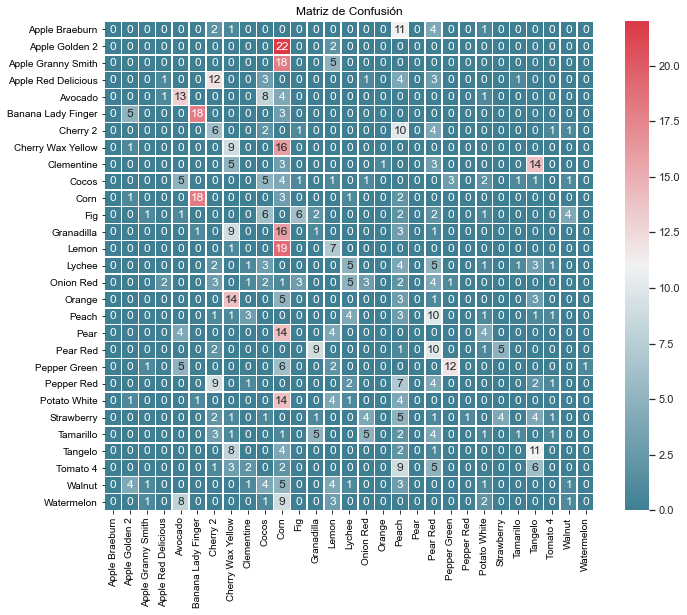

In [40]:
# matriz de confusion
C = confusion_matrix(y_test, y_pred)
df_c=pd.DataFrame(C)
df_c.columns=np.unique(y_test).tolist()
df_c.index=np.unique(y_test).tolist()
f, ax = plt.subplots(figsize=(11, 9))
sns.set()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(df_c, cmap=cmap, square=True,
                 annot=True, fmt='d', linewidths=.5)
ax.set_title('Matriz de Confusión')
plt.show()

<center> Figura 1.2: Matriz de confusión del Modelo 1 con el conjunto de prueba <center>

### Frutas donde el clasificador se equivocó mas

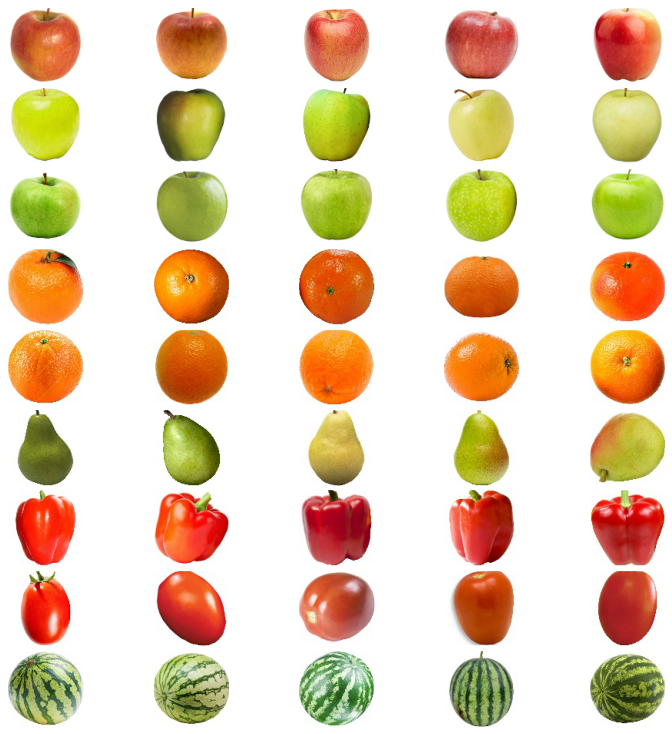

In [110]:
max_errors=['Apple Braeburn','Apple Golden 2','Apple Granny Smith','Clementine','Orange','Pear','Pepper Red','Tomato 4','Watermelon']
error_img=[]
for fuit_type in max_errors:
    imagenes=bgr[y_true==fuit_type]
    n,_,_,_=imagenes.shape
    indx=np.random.choice(n,5,replace=False)
    imagenes=imagenes[indx]
    error_img.append(imagenes)
error_img=np.array(error_img)    

#test
fig = plt.figure(figsize=(10,10)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
i=0
j = 0
k=0
for i in range(0,9):
    for j in range(0,5):
        k+=1
        ax = fig.add_subplot(9, 5, k, xticks=[], yticks=[]) 
        img=error_img[i][j]
        ax.imshow(img[:,:,::-1]) 


plt.show()

<center> Figura 1.3: Frutas del conjunto de prueba donde el clasificador se equivocó mas <center>


<img src="Tarea2_victor_gomez_img_Train.png" height="40%" width="40%"/>
<center> Figura 1.4: Frutas del conjunto de entrenamiento donde el clasificador se equivocó mas <center>

Las imágenes del conjunto de prueba lucen mas brillosas, los colores mas intensos, mientras que en el conjunto de entrenamiento lucen ligeramente opacas, también se podría notar que el estado de la fruta es diferente, por ejemplo en la categoría Watermelon, quizá estos factores que no fueron tomados en cuenta por el modelo son los que afectan su desempeño.

# Ejercicio 2:

Diseñe una red neuronal profunda densa multiclase que reciba como entrada un vector de caracteristicas relacionadas con la forma, color y textura de las variedades de frutas seleccionadas de la base de datos fruit-360 y que la salida use una funcion de activacion softmax.

1. Puede usar como referencia el script generadorCaracteristicas.ipynb para construir la matriz con los datos para el conjunto de entrenamiento y validacion.
2. Proponga y programe las funciones que calculan las caracteristicas de la imagen. Tiene que describir brevemente el tipo de caracteristicas que esta calculando para que se pueda evaluar si estan bien las implementaciones. Puede agregar imagenes de las formulas que esta usando, agregar referencias si usa alguna caracteristica diferente a las vistas en clase, etc.
3. Repita los pasos del 2 al 5 del Ejercicio 1 para construir el clasificador y evaluarlo.
4. Escriba una opinion sobre estas dos maneras de crear los clasificadores, es decir, siguiendo el enfoque del Ejercicio 1 y 2, las ventajas y desventajas que se tienen y, a partir de los resultados obtenidos, discutir si las caracteristicas que propuso permiten clasificar los datos de manera similar al clasificador del Ejercicio 1.

### <font color=green>Tu respuesta aquí</font>

Se propusieron características de las imágenes basadas en Color, Forma y Textura.  Para cada imagen se obtuvieron 29 características, 9 de color, 8 de forma, 12 de Textura. 

- Para el color se utilizó el espacio HSV y se obtuvieron los cuantiles 0.25, 0.5, 0.75 de cada canal.
- Para la forma se obtuvieron los 7 momentos de Hu y la excentricidad de una elipse ajustada a la fruta.
- Para la textura se obtuvieron 12 puntos del histograma LBP (Local Binary Patterns).

### Color

In [44]:
def maxContour(contours):
    cnt_list = np.zeros(len(contours))
    for i in range(0,len(contours)):
        cnt_list[i] = cv2.contourArea(contours[i])
    max_value = np.amax(cnt_list)
    max_index = np.argmax(cnt_list)
    return max_index

# mascara
def getMask(bgrimg):
    labimg  = cv2.cvtColor(bgrimg, cv2.COLOR_BGR2LAB)
    m,n     = labimg.shape[:2]
    mask    = 255*np.ones((m,n), dtype=np.uint8)
    for i in range(m):
        for j in range(n):
            if labimg[i,j,0]>246 and abs(labimg[i,j,1]-128)<6 and abs(labimg[i,j,2]-130)<6:
                mask[i,j] = 0
    
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    imax  = maxContour(contours)
    mask  = np.zeros((m,n), dtype=np.uint8)
    mask  = cv2.drawContours(mask, contours, imax, 255, -1) 
    return mask, contours

#cuantiles del espacio HSV
def rasgosColorHSV(bgrimg1, mask1):
    #mask
    bgrimg1_mask = bgrimg1.copy()
    
    bgrimg1_mask[mask1 == 0] = 0
    bgrimg1_mask[mask1 != 0] = bgrimg1[mask1 != 0]

    # lista de las coordenadas de los pixeles que son blancos en la mascara binaria
    coords1 = np.column_stack(np.where(mask1 > 0))

    # espacio HSV
    hsvimg1    = cv2.cvtColor(bgrimg1, cv2.COLOR_BGR2HSV)

    # arreglo que tiene los colores HSV de los pixeles sobre el objeto 
    hsv1 = hsvimg1[coords1[:,0], coords1[:,1],:]
    
    
    h=hsv1[:,0].flatten() #vector renglon
    s=hsv1[:,1].flatten() #vector renglon
    v=hsv1[:,2].flatten() #vector renglon
    #estadisticos del canal H
    return [np.nanquantile(h, 0.25),np.nanquantile(h, 0.5),np.nanquantile(h, 0.75),np.nanquantile(s, 0.25),np.nanquantile(s, 0.5),np.nanquantile(s, 0.75),np.nanquantile(v, 0.25),np.nanquantile(v, 0.5),np.nanquantile(v, 0.75)]

### Forma

In [45]:
# Funcion que devuelve los 7 invariantes de Hu
def FormaHu(contours):
    imax = maxContour(contours)
    cnt  = contours[imax]
    M    = cv2.moments(cnt)
    huM  = cv2.HuMoments(M)
    return huM.flatten().tolist()

# Funcion que devuelve la excentricidad de la elipse (exc->0 circulo, exc->1 linea)
def Excentricidad(contours):
    imax = maxContour(contours)
    cnt  = contours[imax]
    ellipse = cv2.fitEllipse(cnt)
    (x,y),(ma,MA),angle=ellipse
    exc=(1-((ma)**2/(MA)**2))**(1/2)
    return [exc]

def rasgosForma(contours):
    rasgos1=FormaHu(contours)
    rasgos2=Excentricidad(contours)
    rasgos=rasgos1+rasgos2
    return rasgos

### Textura

In [46]:
#Local Binary Patterns
def getHist_LBP(image, numPoints, radius, eps=1e-7):
    lbp = feature.local_binary_pattern(image, numPoints, radius, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, numPoints+3), range=(0, numPoints+2))
    # normalize the histogram
    hist = hist.astype("float")
    hist /= (hist.sum() + eps)
    # return the histogram of Local Binary Patterns
    return hist

#centroide de la fruta
def centroide(contours):
    cnt  = contours[0]
    M    = cv2.moments(cnt)
    # Coordenadas del centroide
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    return cx, cy


def rasgosTextura(bgrimg1):
    cx1, cy1 = centroide(bgrimg1)
    grayimg1 = cv2.cvtColor(bgrimg1, cv2.COLOR_BGR2GRAY)

    # Tomamos una subimagen alrededor del centroide
    x0  = max([0, cx1-40])
    x1  = min([cx1+40,grayimg1.shape[1]])
    y0  = max([0, cy1-40])
    y1  = min([cy1+40,grayimg1.shape[0]])
    hlbp1  = getHist_LBP(grayimg1[y0:y1,x0:x1], 10, 5)
    
    return hlbp1.tolist()

#regresa todos los rasgos (29)
def rasgosFCT(bgrimg1):
    mask1,contours1    = getMask(bgrimg1) #mask and contours
    rasgos1=rasgosColorHSV(bgrimg1,mask1) #rasgos color
    rasgos2=rasgosForma(contours1) #rasgos forma
    rasgos3=rasgosTextura(bgrimg1) #rasgos textura
    rasgos=rasgos1+rasgos2+rasgos3
    return rasgos

- Para cada imagen del conjunto de entrenamiento como de prueba se obtuvieron las anteriores características y se estandarizaron.

- Para corroborar que las características realmente nos sirven para caracterizar los tipos de frutas se aplicó PCA y graficaron las 2 primeras componentes (Figura 2) y se observó que las características propuestas logran el objetivo puesto que se observa como hacia la derecha tienden las formas alargadas (plátanos) y hacia la izquierda las formas redondas (manzanas), en el eje vertical por texturas (cocos y nueces en el extremo superior) y hay agrupamientos por colores. 


<img src="Tarea2_victor_gomez_PCA.png" height="70%" width="70%"/>
<center> Figura 2.1: Representación de las frutas sobre los dos primeros componentes principales utilizando PCA <center>

## Modelos:

Se diseñaron 2 modelos: 

- Modelo 1 con optimizador rmsprop, tamaño del Batch de 8, función de activación en las capas ocultas relu, 2 capas ocultas, 82 unidades en cada capa oculta, 3 epocas, Batch normalization y regularización dropout con tasa de 0.25 en cada capa oculta. Tiempo promedio por época 3.17s, valor de la función de perdida y exactitud para el conjunto de validación de 0.006 y 0.998 respectivamente.

- Modelo 2 con optimizador adam, tamaño del Batch de 8, función de activación en las capas ocultas relu, 3 capas oculta, 92 unidades, 3 epocas, Batch normalization y regularización dropout con tasa de 0.25 en cada capa oculta. Tiempo promedio por época 3.8s, valor de la función de perdida y exactitud para el conjunto de validación de 0.018 y 0.993 respectivamente.


El mejor modelo seleccionado fue el primero, debido a que la complejidad del modelo 1 es menor y al revisar las matrices de confusión correspondientes el primer modelo muestra menos errores.


<img src="Tarea2_victor_gomez_P2M1.png" height="40%" width="40%"/>
<center> Figura 2.2: Matriz de confusión del Modelo 1 <center>

In [60]:
Modelo2 = tf.keras.models.load_model('Tarea2_victor_gomez_P2M1.h5') #carga el mejor modelo
Modelo2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 82)                2460      
_________________________________________________________________
batch_normalization (BatchNo (None, 82)                328       
_________________________________________________________________
dropout (Dropout)            (None, 82)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 82)                6806      
_________________________________________________________________
batch_normalization_1 (Batch (None, 82)                328       
_________________________________________________________________
dropout_1 (Dropout)          (None, 82)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 29)                2

El procedimiento que se siguió  para diseñar los modelos fue el mismo que en el ejercicio anterior, pero con las características obtenidas.

## Visualiza los modelos, la función de costo y exactitud por épocas

In [ ]:
server2 = tb('Tarea2_victor_gomez_P2', 6007) #abre tensorboard en una nueva pagina, si hay problemas volver a cargar la pagina

In [ ]:
server2.kill()  # stops the first server

### Transforma las imagenes

In [57]:
X_test2=np.zeros((743,24+5))
for i in range(743):
    im = bgr[i] #lee
    X_test2[i,:]=rasgosFCT(im)

print(X_test2.shape)

(743, 29)


In [58]:
# standarize.
scaler = StandardScaler()
scaler.fit(X_test2,y_true)
X_test2=scaler.transform(X_test2)


# Flatten images to 1-D vector of 784 features (28*28).
num_features = 24+5
X_test2 = X_test2.reshape([-1, num_features])

y_test=np.reshape(y_true,(-1, 1))
enc_test=OneHotEncoder().fit(y_test)
y_test = enc_test.transform(y_test).toarray()

### Predicción y resultados

In [61]:
y_pred = Modelo2.predict(X_test2) #predice
y_pred=enc_test.inverse_transform(y_pred) #regresa la etiqueta
y_test=enc_test.inverse_transform(y_test)

In [62]:
print('Test')
print(classification_report(y_test,y_pred))

Test
                     precision    recall  f1-score   support

     Apple Braeburn       0.03      0.05      0.04        19
     Apple Golden 2       0.09      0.04      0.06        24
 Apple Granny Smith       0.19      0.17      0.18        23
Apple Red Delicious       0.00      0.00      0.00        25
            Avocado       0.14      0.19      0.16        27
 Banana Lady Finger       0.53      0.77      0.62        26
           Cherry 2       0.14      0.12      0.13        25
  Cherry Wax Yellow       0.14      0.04      0.06        26
         Clementine       0.24      0.19      0.21        26
              Cocos       0.13      0.16      0.15        25
               Corn       0.14      0.24      0.17        25
                Fig       0.20      0.48      0.28        25
         Granadilla       0.36      0.16      0.22        31
              Lemon       0.17      0.07      0.10        27
             Lychee       0.46      0.42      0.44        26
          Onion Re

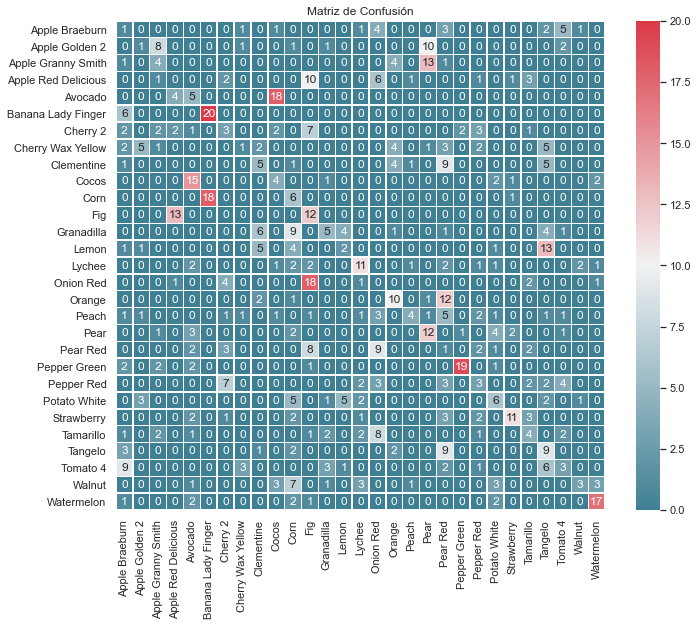

In [63]:
# matriz de confusion
C = confusion_matrix(y_test, y_pred)
df_c=pd.DataFrame(C)
df_c.columns=np.unique(y_test).tolist()
df_c.index=np.unique(y_test).tolist()
f, ax = plt.subplots(figsize=(11, 9))
sns.set()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(df_c, cmap=cmap, square=True,
                 annot=True, fmt='d', linewidths=.5)
ax.set_title('Matriz de Confusión')
plt.show()

<center> Figura 2.3: Matriz de confusión del Modelo 1 con el conjunto de prueba <center>

### Frutas donde el clasificador se equivocó mas

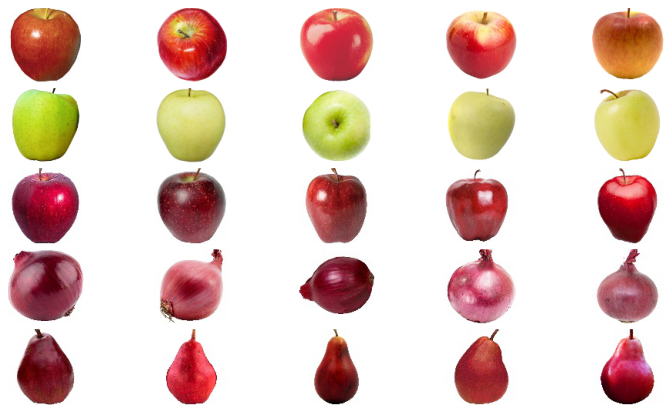

In [111]:
max_errors=['Apple Braeburn','Apple Golden 2','Apple Red Delicious','Onion Red','Pear Red']
error_img=[]
for fuit_type in max_errors:
    imagenes=bgr[y_true==fuit_type]
    n,_,_,_=imagenes.shape
    indx=np.random.choice(n,5,replace=False)
    imagenes=imagenes[indx]
    error_img.append(imagenes)
error_img=np.array(error_img)    
#error_img.shape
#test
fig = plt.figure(figsize=(10,10)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
i=0
j = 0
k=0
for i in range(0,5):
    for j in range(0,5):
        k+=1
        ax = fig.add_subplot(9, 5, k, xticks=[], yticks=[]) 
        img=error_img[i][j]
        ax.imshow(img[:,:,::-1]) 


plt.show()

<center> Figura 2.4: Frutas del conjunto de prueba donde el clasificador se equivocó mas <center>

<img src="Tarea2_victor_gomez_img_Train2.png" height="40%" width="40%"/>
<center> Figura 2.5: Frutas del conjunto de entrenamiento donde el clasificador se equivocó mas <center>

En este caso sigue siendo muy similar al del ejercicio uno, las imágenes del conjunto de prueba lucen más brillosas, colores más intensos y en un estado mejor que las del conjunto de entrenamiento y quizá estos factores son los que afectan el desempeño del modelo. en este caso quizá sea mayor el efecto de las diferentes texturas, es decir una fruta en mejor estado tiene menos cambios en pixeles que una que tiene un estado pobre, por ejemplo, para el caso de la fruta Apple Golden 2 se nota que la clasificó en su mayoría como Apple Granny Smith, que sería la categoría más parecida, pero en mejor estado.

- La forma de crear clasificadores fue mas sencilla en el caso del ejercicio uno que el del ejercicio dos, puesto que requiere de menos pasos, menos preprocesamiento a las imágenes, principalmente hacer un escalamiento a su tamaño, mientras que en el segundo caso fue mas tardado dado que hubo que obtener características de estas, sin embargo, con el conjunto de prueba el resultado fue mejor el del segundo enfoque al del primero, aun considerando que los accuracy de ambos fueron muy pobres.


- Por lo tanto, resumiendo, con el primer enfoque se obtiene más rápidamente un modelo, pero este es muy pobre en su desempeño, mientras que en el enfoque dos se obtienen mejores resultados pero es muy importante considerar en este caso al menos los cambios en el color y textura por el estado de la fruta para tenerlas en cuenta en el conjunto de entrenamiento al entrenar el modelo, y quizá agregar más características y ver como mejora el modelo ya que este enfoque mostró mejores resultados a pesar de que toma más tiempo en procesar las imágenes.
